In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv('telecom_customer_churn.csv')

In [ ]:
df.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   viewer_id                    6588 non-null   object 
 1   gender                       6588 non-null   object 
 2   age                          6588 non-null   int64  
 3   married                      6588 non-null   object 
 4   number_of_family_dependents  6588 non-null   int64  
 5   city                         6588 non-null   object 
 6   zip_code                     6588 non-null   int64  
 7   latitude                     6588 non-null   float64
 8   longitude                    6588 non-null   float64
 9   number_of_referrals          6588 non-null   int64  
 10  tenure_in_months             6588 non-null   int64  
 11  offer                        2990 non-null   object 
 12  internet_service             6588 non-null   object 
 13  internet_type     

In [ ]:
df.describe()

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,93491.512750,36.199980,-119.757549,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,1857.716269,2.472582,2.155838,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989286,-121.790034,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,95333.250000,38.169605,-117.967399,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
#total missing values for each column
df.isnull().sum()

,0
viewer_id,0
gender,0
age,0
married,0
number_of_family_dependents,0
city,0
zip_code,0
latitude,0
longitude,0
number_of_referrals,0


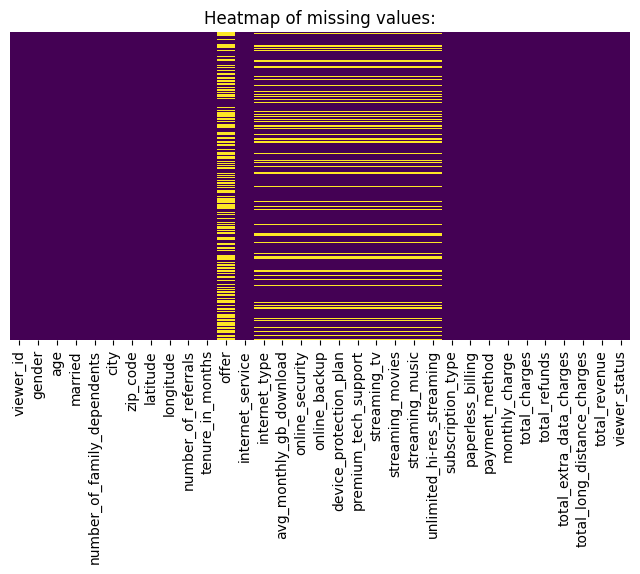

In [ ]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of missing values:')
plt.show()


 The numerical columns are as follows:  ['age', 'number_of_family_dependents', 'zip_code', 'latitude', 'longitude', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_gb_download', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue']


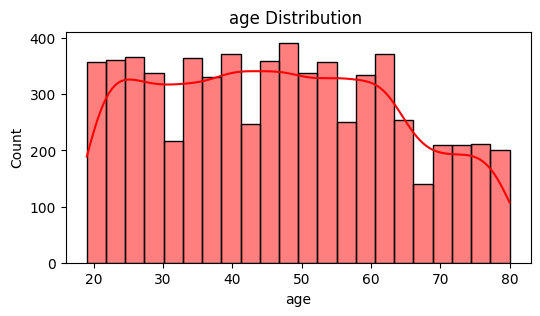

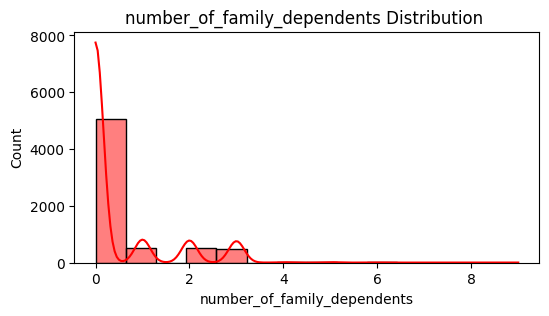

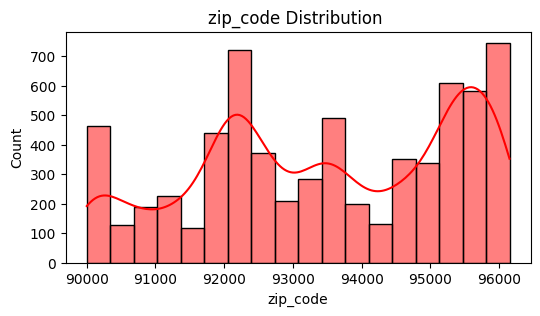

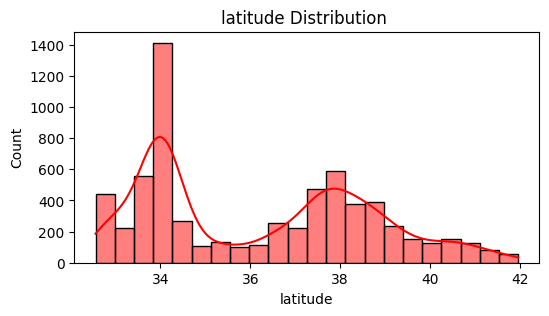

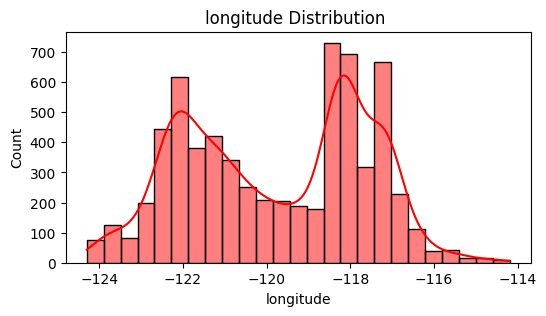

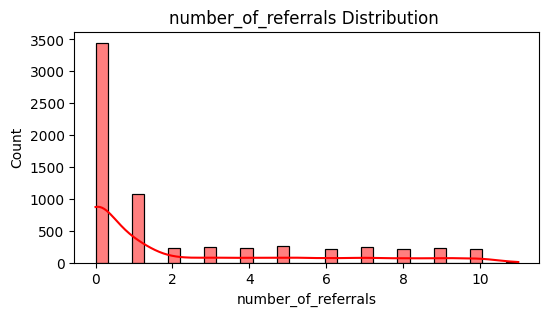

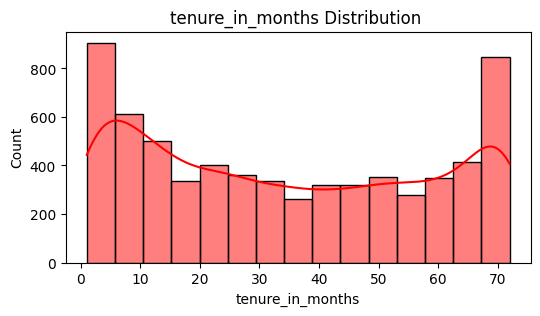

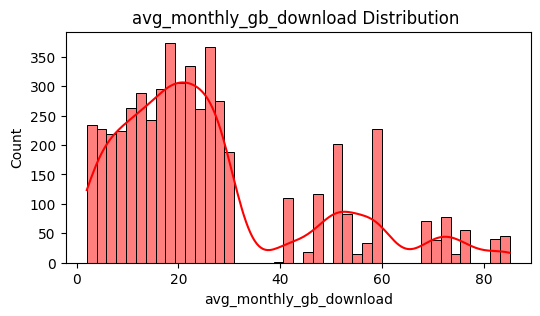

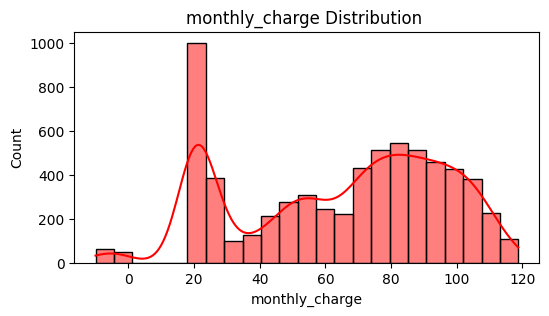

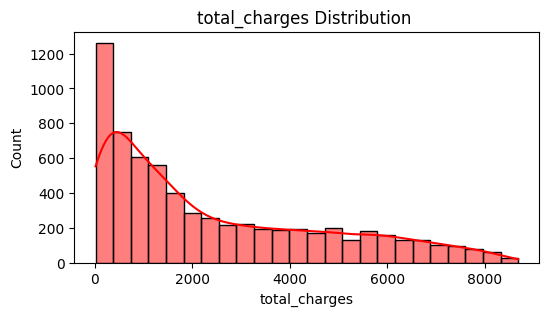

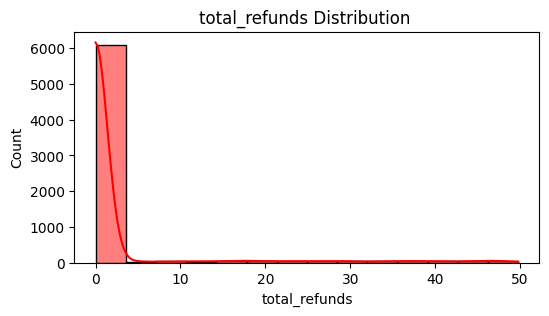

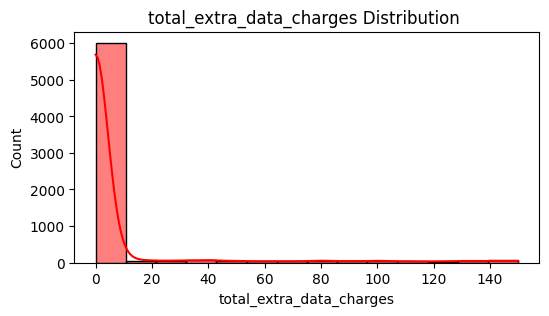

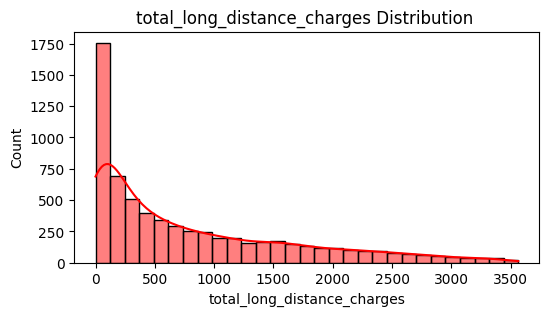

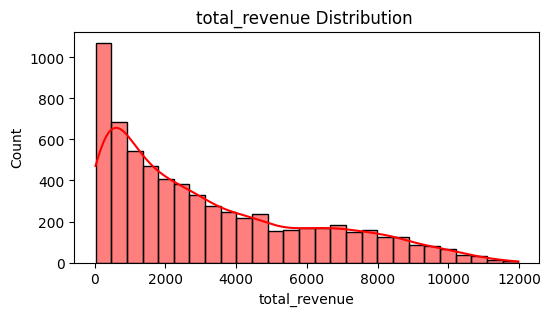

In [ ]:
nums_col=df.select_dtypes(include=np.number).columns.tolist()
print("\n The numerical columns are as follows: ", nums_col)
for column in nums_col:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column], kde=True, color='red')
    plt.title(f'{column} Distribution ')
    plt.show()


The categorical columns are as follows:  ['viewer_id', 'gender', 'married', 'city', 'offer', 'internet_service', 'internet_type', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type', 'paperless_billing', 'payment_method', 'viewer_status']


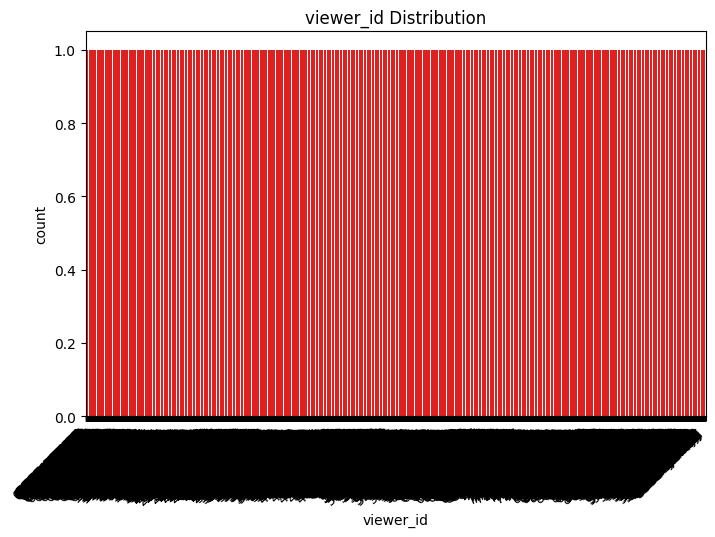

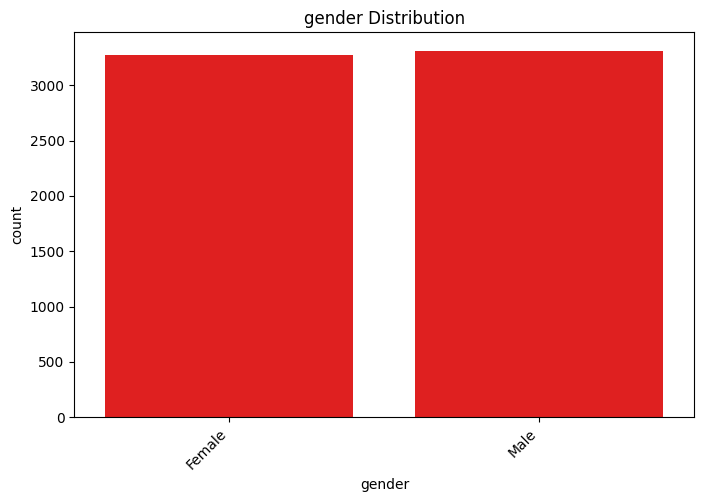

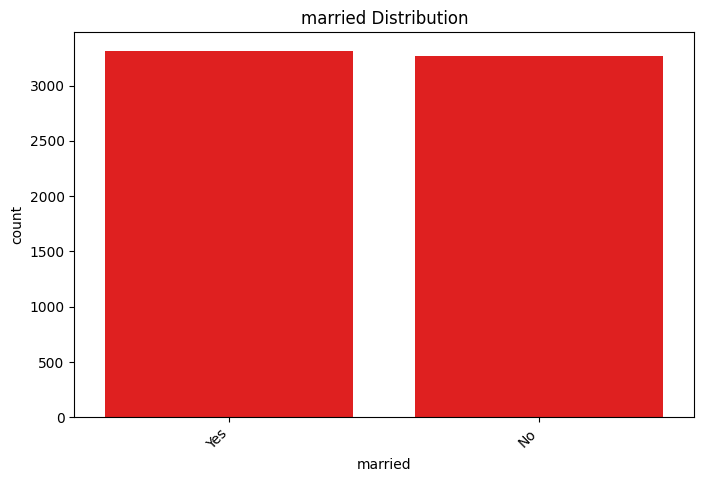

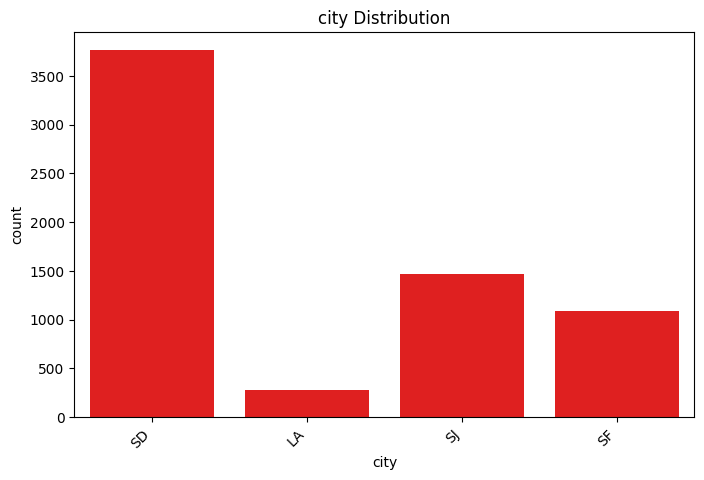

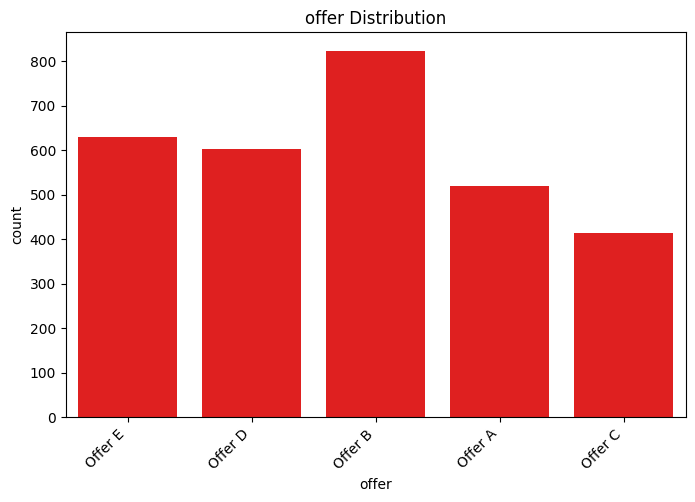

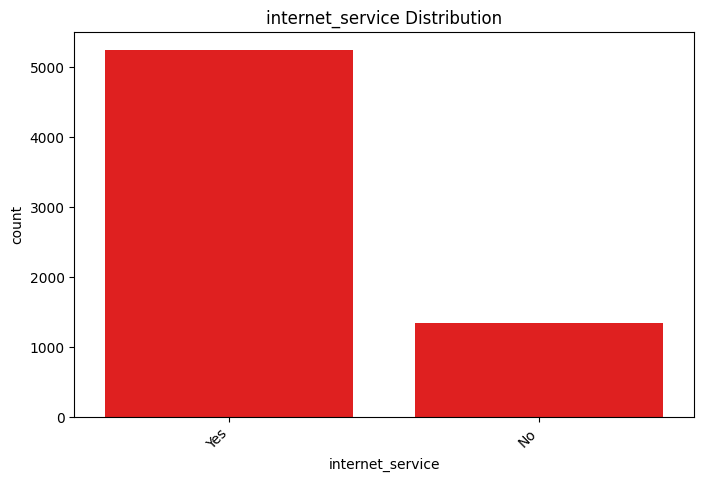

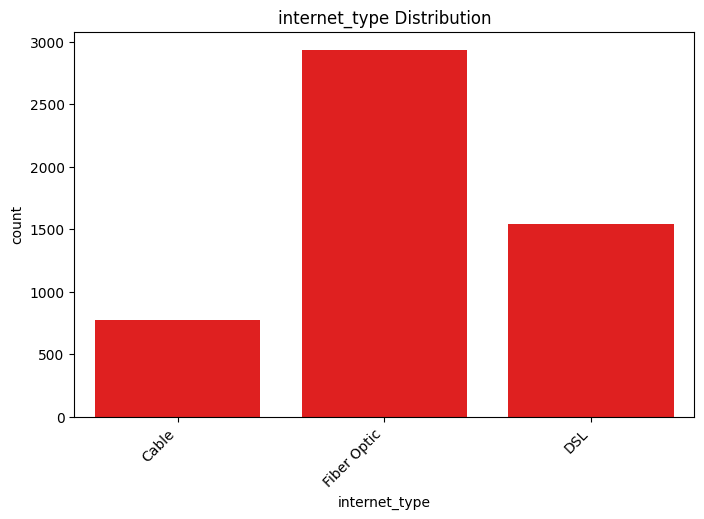

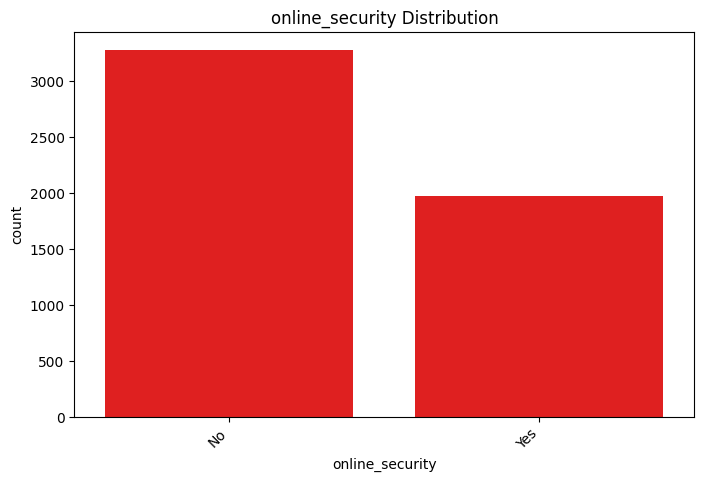

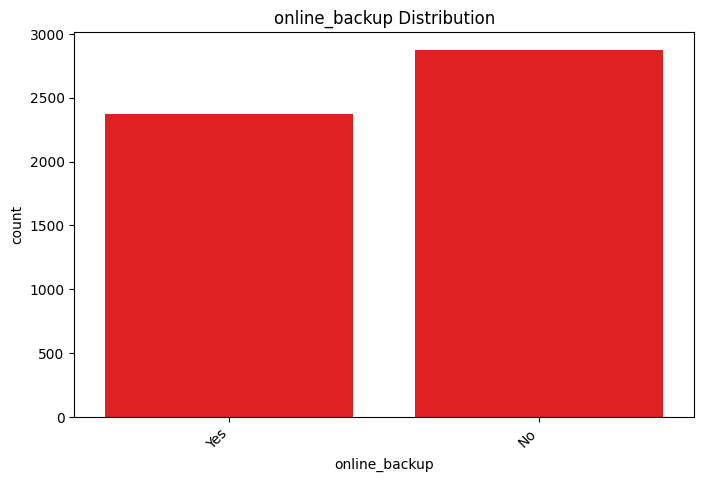

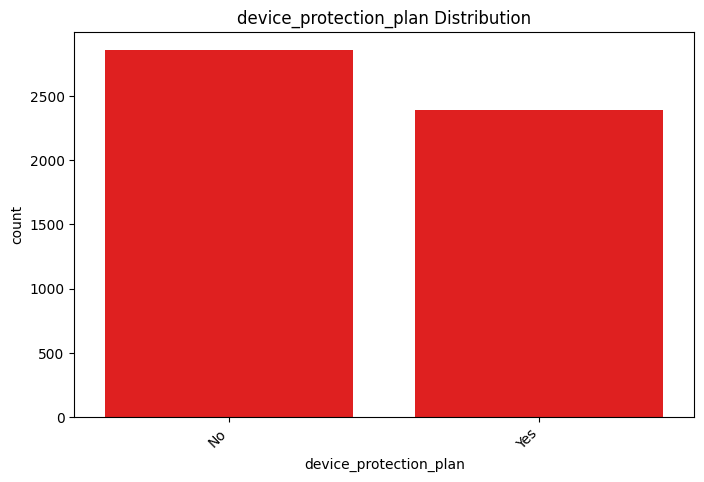

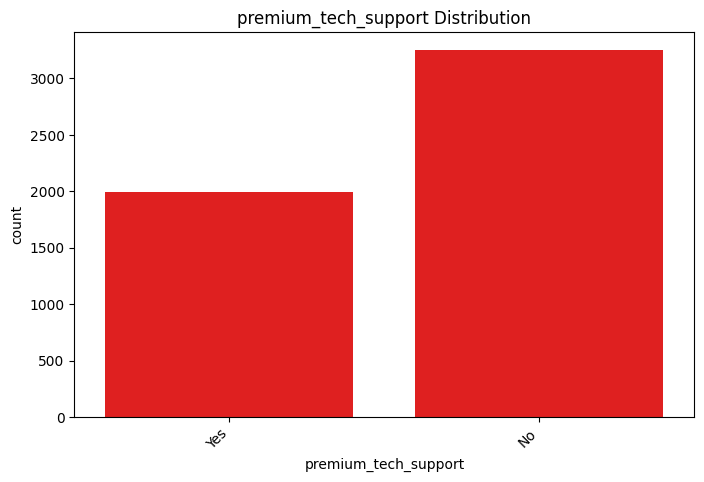

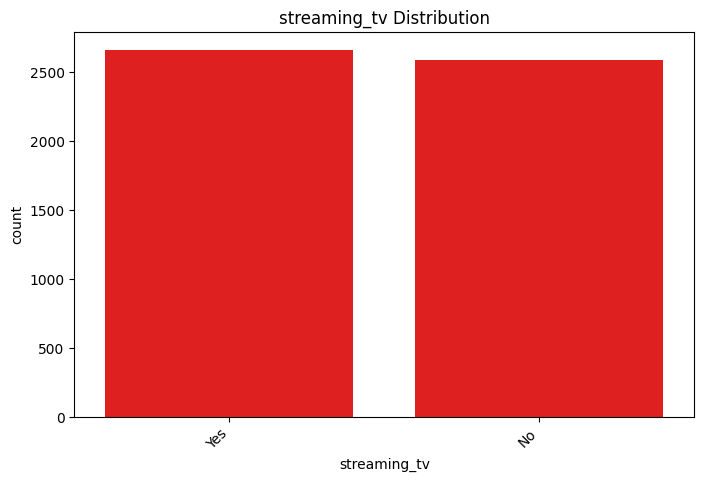

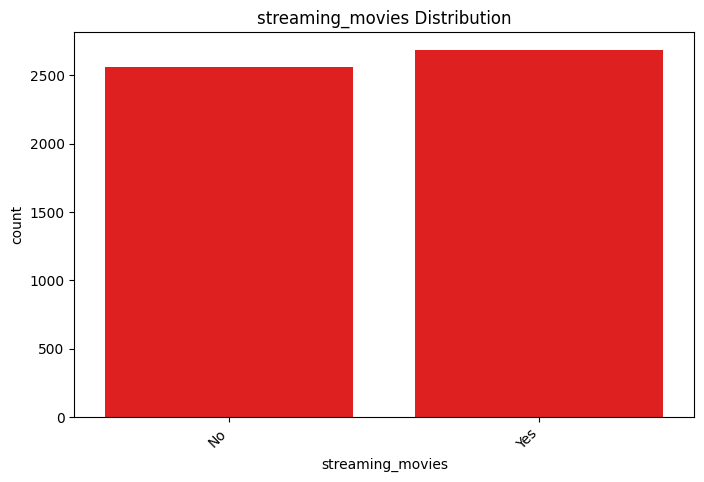

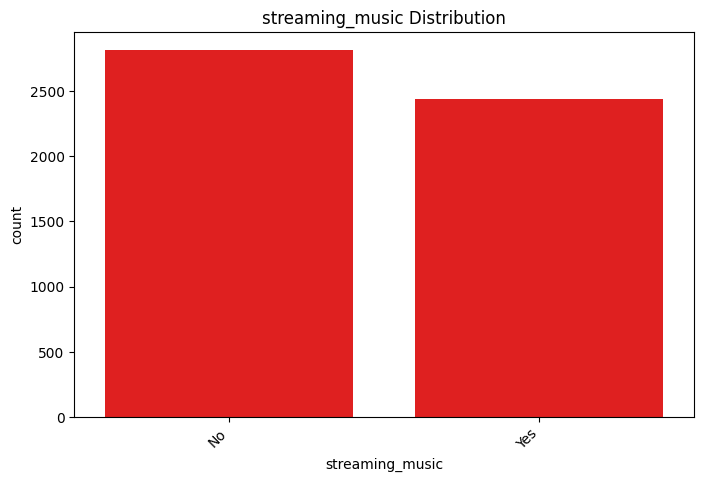

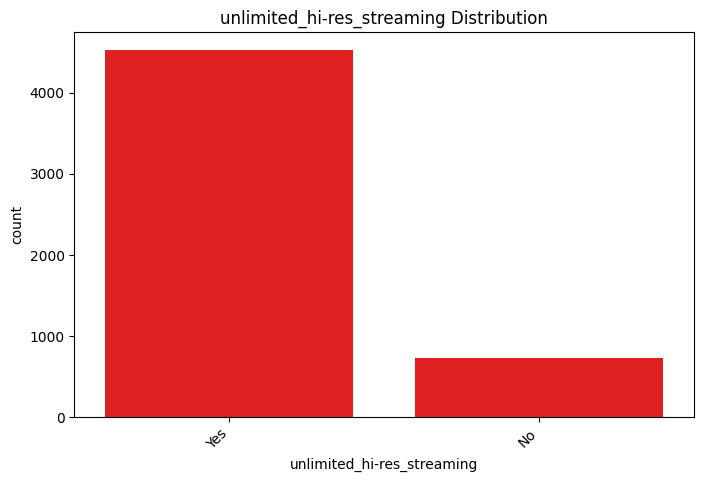

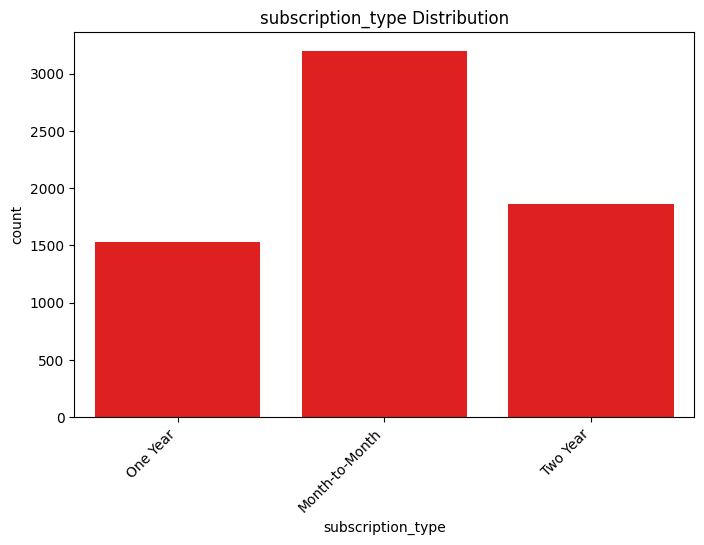

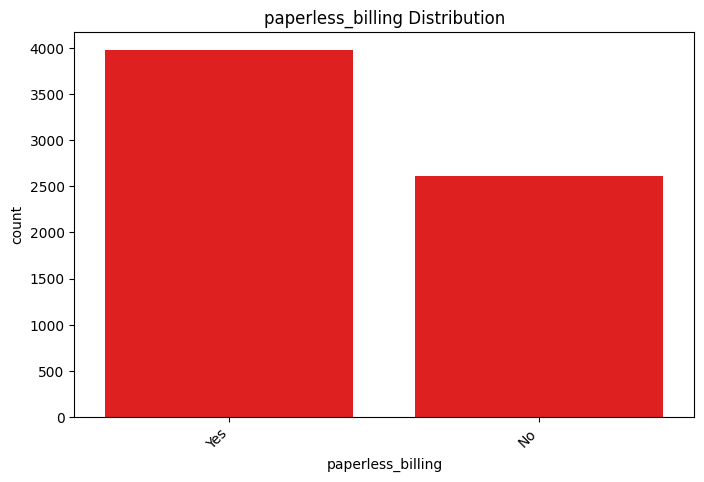

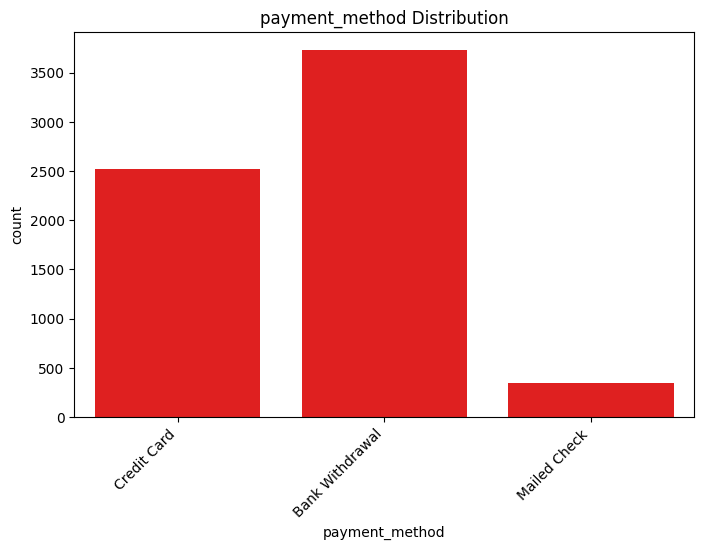

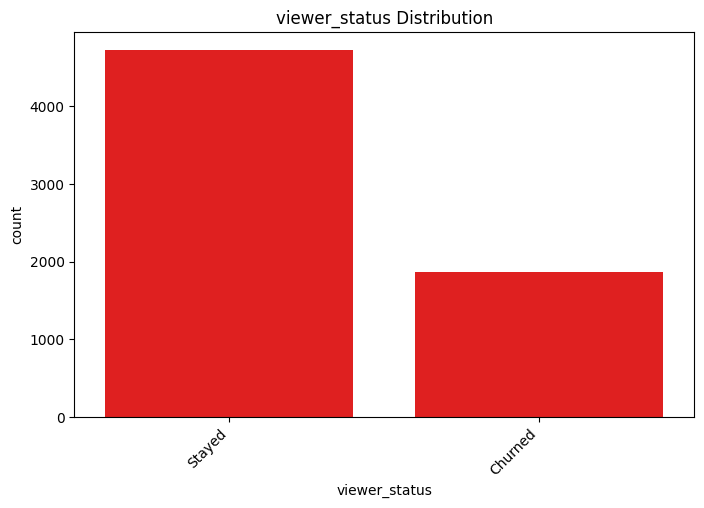

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("\nThe categorical columns are as follows: ", cat_cols)
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col,color='red')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()

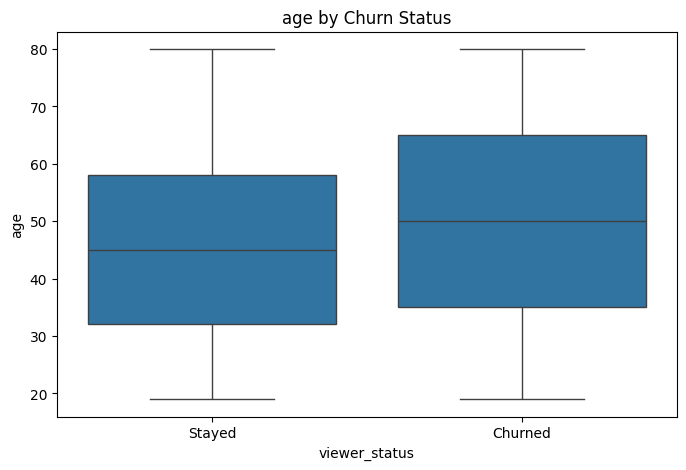

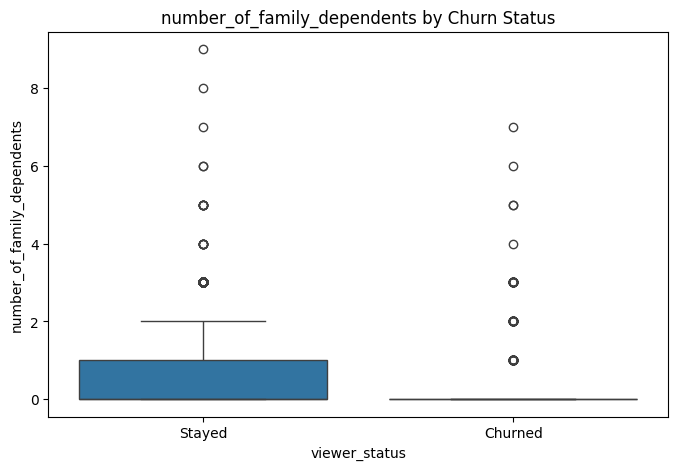

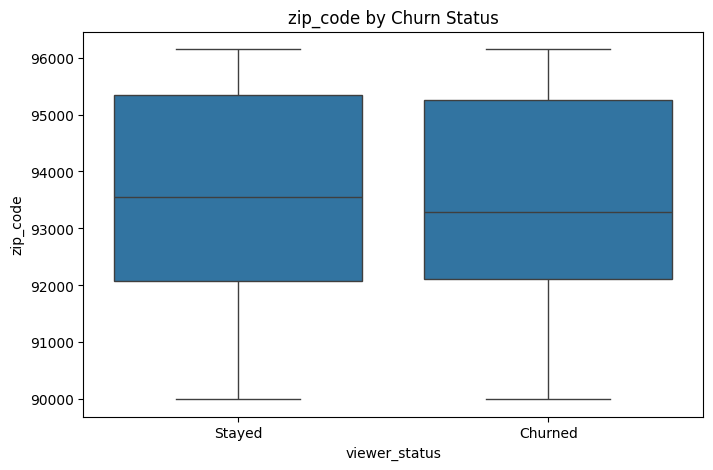

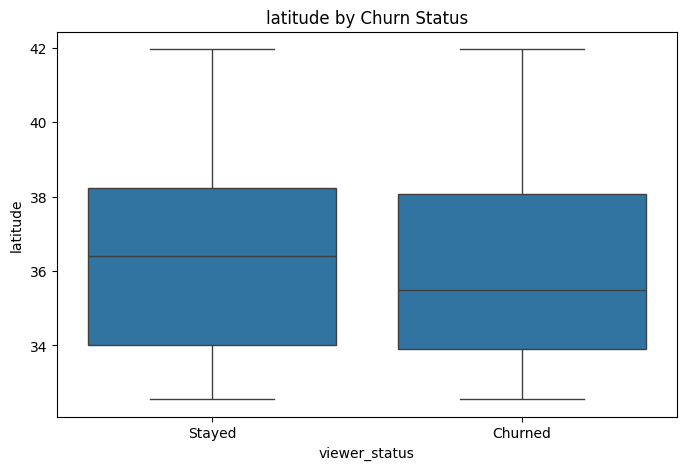

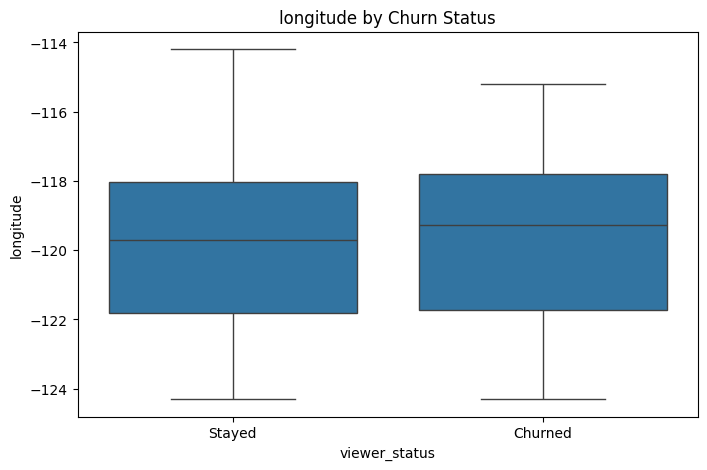

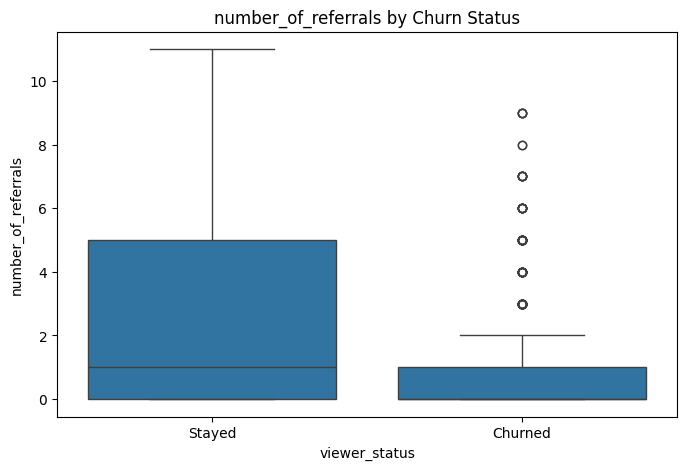

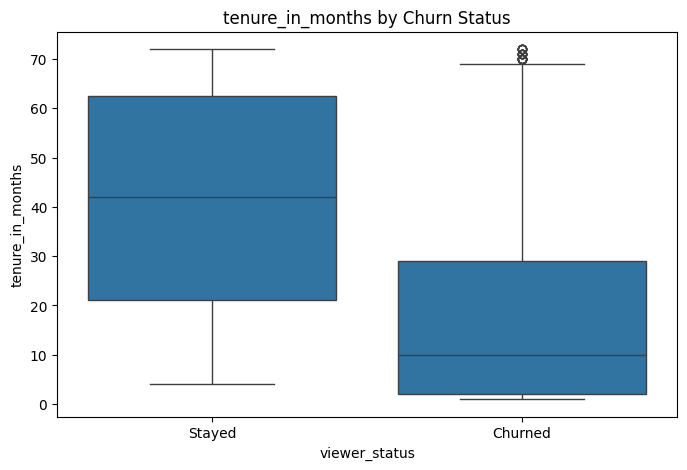

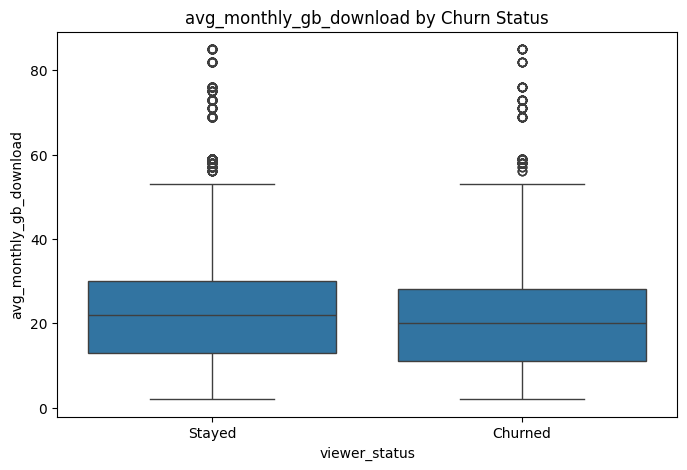

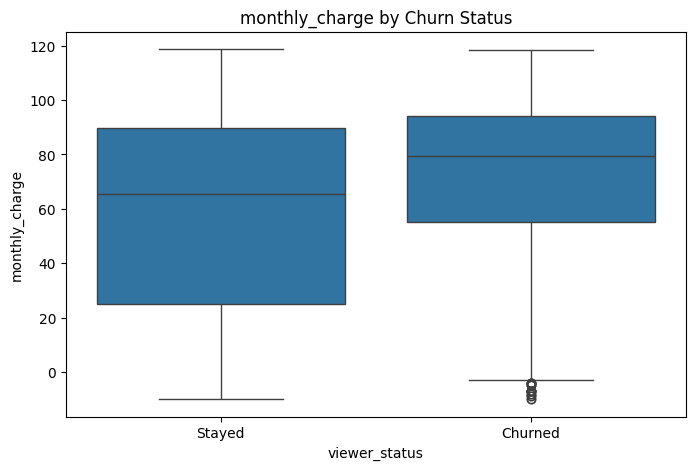

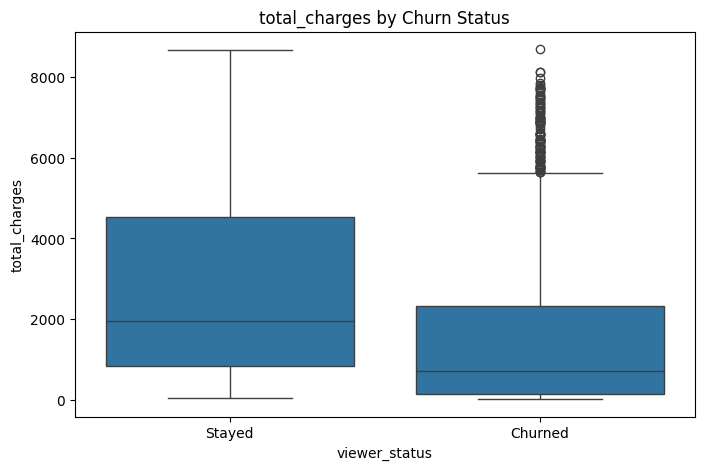

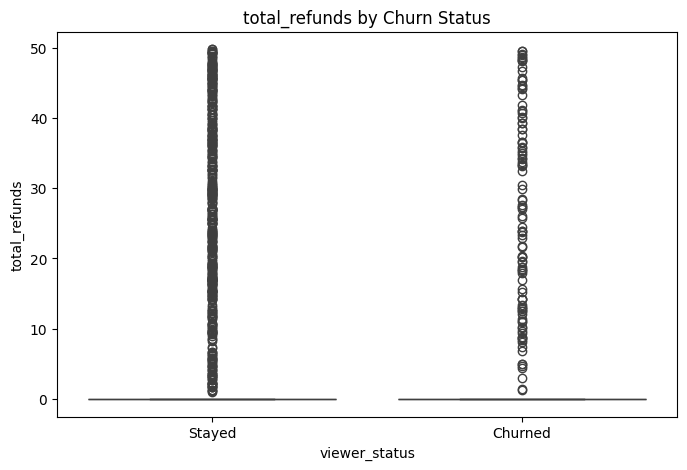

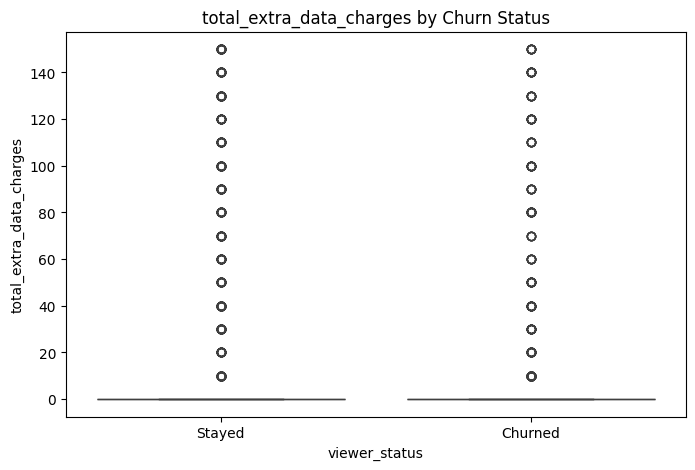

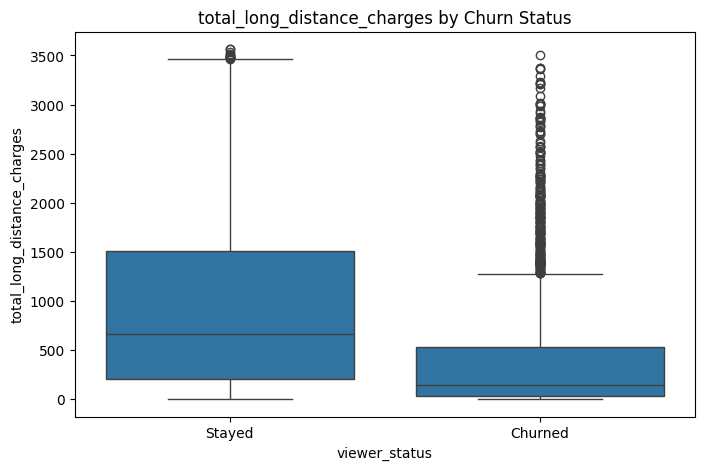

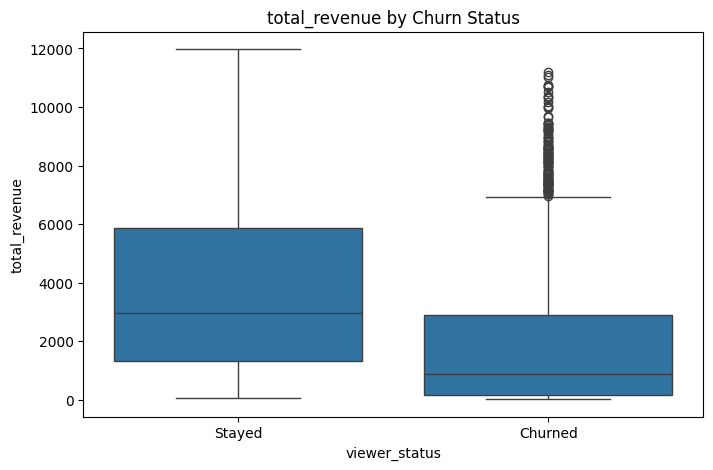

In [ ]:
# we know that target is viewer status, so now we will display relationship between each numerical feature & target
if 'viewer_status' in df.columns:
    for col in nums_col:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x='viewer_status', y=col)
        plt.title(f'{col} by Churn Status')
        plt.show()


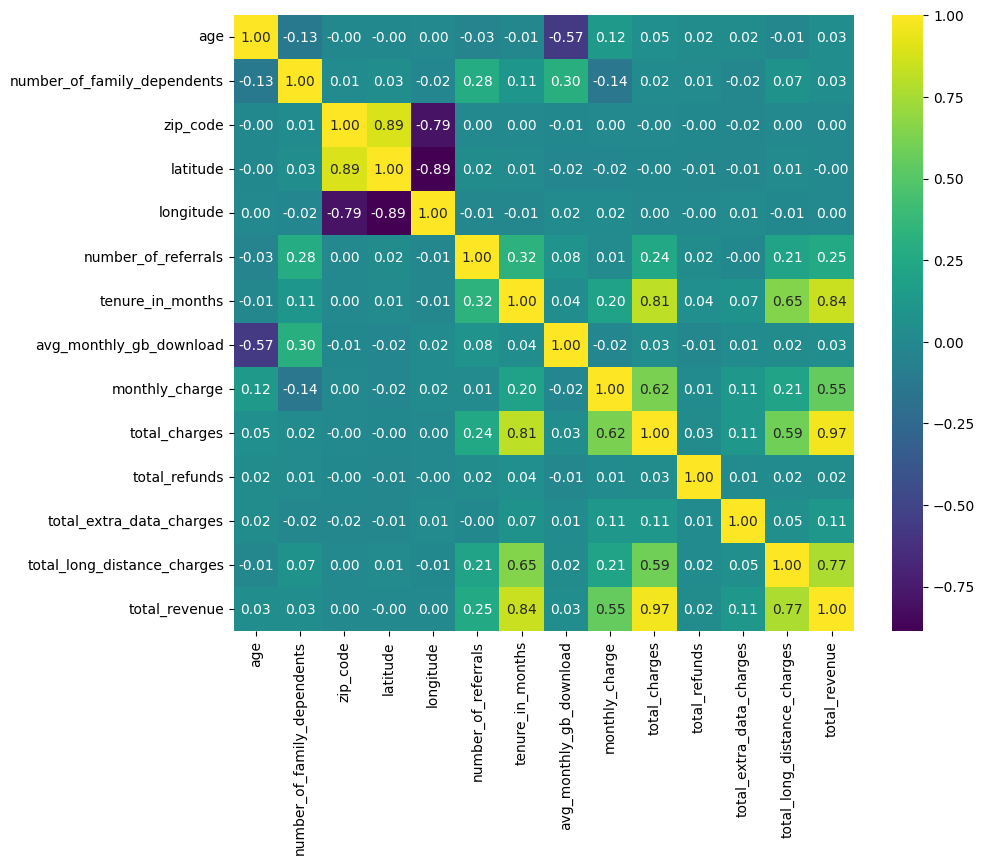

In [ ]:
#finding correlation matrix of numerical features
correlation_matrix = df[nums_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.show()

Handling missing values

In [ ]:
#imputing the missing numerical values with its median
for col in nums_col:
    if df[col].isnull().any():
      median_val = df[col].median()
      df[col] = df[col].fillna(median_val)

In [ ]:
#imputing missing categorical values with its most frequent value
for col in cat_cols:
    if df[col].isnull().any():
        most_frequent = df[col].mode()[0]
        df[col] = df[col].fillna(most_frequent)


Handling outliers

In [ ]:
for col in nums_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

#replacing with boundaries for the columns which have outliers
  if outlier_count > 0:
      print(f"   {col} has outliers, which are: {outlier_count}")
      df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
      df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

  else:
    print(f"    {col} has no outliers")


    age has no outliers
   number_of_family_dependents has outliers, which are: 1547
    zip_code has no outliers
    latitude has no outliers
    longitude has no outliers
   number_of_referrals has outliers, which are: 649
    tenure_in_months has no outliers
   avg_monthly_gb_download has outliers, which are: 1036
    monthly_charge has no outliers
    total_charges has no outliers
   total_refunds has outliers, which are: 520
   total_extra_data_charges has outliers, which are: 684
   total_long_distance_charges has outliers, which are: 136
   total_revenue has outliers, which are: 9


Encoding

In [ ]:
#encoding categorical variables. encoding all the binary variables using label encoder
for col in cat_cols:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

#encoding multi value variables using one-hot encoding
    elif df[col].nunique() > 2:
      dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
      df = pd.concat([df, dummies], axis=1)
      df.drop(columns=[col], axis=1, inplace=True)





Normalizing numeric features

In [ ]:
scaler=StandardScaler()
df[nums_col] = scaler.fit_transform(df[nums_col])

Task 1- Perform exploratory analysis on the data and prepare it for modeling. Examine summary
statistics, handle missing values/outliers, make binary and dummy variables where applicable.
Also make sure to normalize the numeric variables before feeding into the models.

Answer Task 1- Outliers in numerical columns were handled using the IQR method. Outliers were replaced with the upper or lower bounds calculated using the IQR. Missing values in numerical columns were imputed using the median.Missing values in categorical columns were imputed using the mode.Binary categorical features (2 unique values) were converted using Label Encoding.Multi-value categorical features (more than 2 unique values) were converted using One-Hot Encoding (creating dummy variables).Numerical features were normalized using StandardScaler. This ensures that all numerical features have a mean of 0 and a standard deviation of 1, which is important for distance-based algorithms like K-Means.


Clustering

In [ ]:
if 'viewer_id' in df.columns:
    df_clustering = df.drop(columns=['viewer_id'], axis = 1)
else:
    df_clustering = df.copy()

In [ ]:
if 'viewer_status' in df_clustering.columns:
    df_clustering = df_clustering.drop(columns=['viewer_status'], axis = 1)

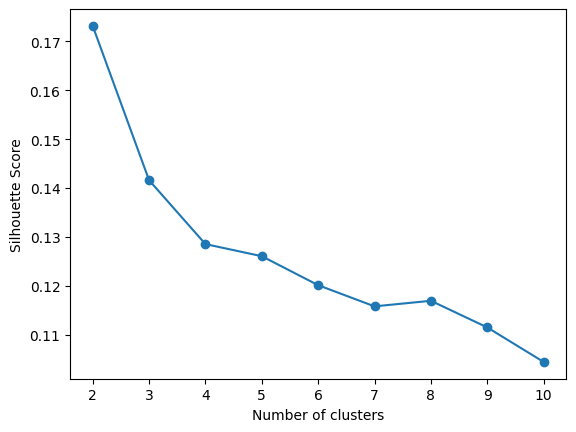

In [ ]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for more robust K-means calculations
    cluster_labels = kmeans.fit_predict(df_clustering)
    silhouette_avg = silhouette_score(df_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
optimal_clusters = range(2,11)[silhouette_scores.index(max(silhouette_scores))]
print(f"    {optimal_clusters} is the no. of clusters we would consider")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df_clustering)


    2 is the no. of clusters we would consider


Task 2 - Explore if there are segments of customers with similar account profiles and churn rates. Use
clustering and explain your choice of number of clusters.

Answer Task 2- To segment the customers, I used K-Means clustering, since it is efficient for large datasets. The dataset features were continuous and numeric, making it suitable for distance-based clustering.The inertia (sum of squared distances) is minimized, ensuring well-separated clusters.

The Silhouette Score was used to determine the optimal number of clusters.I used the Silhouette Score, which measures Compactness (intra-cluster distance) ie How close points are within a cluster as well as Separation (inter-cluster distance) ie How distinct clusters are from each other.
The code iterated through 2 to 10 clusters and calculated the Silhouette Score for each. Based on the output, the highest Silhouette Score was achieved with 2 clusters.


Training the model (also its a classification problem since the target variable ie viewer_status, has two discrete classes that are Stayed and Churned)

In [ ]:
if 'viewer_status' in df.columns:
    X = df.drop(['viewer_status', 'cluster', 'viewer_id'], axis=1, errors='ignore')
    y = df['viewer_status']
else:
    print("Error: 'viewer_status' not found in the dataset. Cannot train the model.")
    exit()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression-

In [ ]:
#adding solver for convergence
logistic_regression = LogisticRegression(random_state=42, solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred_logistic_regression = logistic_regression.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print(f"  Accuracy: {accuracy_logistic_regression:.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, y_pred_logistic_regression)}")
print(f"  {classification_report(y_test, y_pred_logistic_regression)}")


  Accuracy: 0.86
  Confusion Matrix:
 [[ 423  159]
 [ 125 1270]]
                precision    recall  f1-score   support

           0       0.77      0.73      0.75       582
           1       0.89      0.91      0.90      1395

    accuracy                           0.86      1977
   macro avg       0.83      0.82      0.82      1977
weighted avg       0.85      0.86      0.86      1977



Random Forest

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
print(f"  {classification_report(y_test, y_pred_random_forest)}")
print(f"  Accuracy: {accuracy_rf:.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, y_pred_random_forest)}")

                precision    recall  f1-score   support

           0       0.87      0.63      0.73       582
           1       0.86      0.96      0.91      1395

    accuracy                           0.86      1977
   macro avg       0.86      0.79      0.82      1977
weighted avg       0.86      0.86      0.86      1977

  Accuracy: 0.86
  Confusion Matrix:
 [[ 367  215]
 [  57 1338]]


Calculating top 5 most predictive factors

In [ ]:
feature_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print(f"{feature_importances_sorted.head(5)}")

tenure_in_months                    0.069164
total_revenue                       0.068940
total_charges                       0.064342
subscription_type_Month-to-Month    0.054755
total_long_distance_charges         0.051218
dtype: float64


Task 3 - Build two models to predict churn using different supervised learning approaches. What are the
top 5 most predictive factors? How do the models compare in terms of accuracy?

Answer Task 3- The 2 models which were used were - Logistic Regression & Random Forest


Comparison of 2 Models:
1) Logistic Regression is used since its used for for binary classification.
Logistic Regression's Accuracy is 85.63% . It was used to capture relationships between features and churn likelihood.

2) Random Forest is used since it handles non-linear interactions between variables & also it reduces overfitting by averaging multiple decision trees.Random Forest's Accuracy is 86.24% . It was used to capture complex interactions between features.

Hence we can say that Random Forest model performs slightly better in terms of accuracy. This suggests that churn prediction benefits from capturing non-linear relationships between customer behavior and churn likelihood. This reinforces the need to consider interactions between multiple features rather than assuming a purely linear relationship.




Evaluation Metrics Explanation:

Accuracy alone is not enough. Precision & Recall are crucial because of potential class imbalance.

Confusion Matrix Analysis:

False negatives (actual churners predicted as "stayed") are more concerning.

Random Forest has higher recall (0.96 vs. 0.91), meaning fewer churners are misclassified.







Top 5 Predictive Factors (Random Forest): The code extracts feature importances from the Random Forest model:

1. Tenure in months (0.069) - Customers with a longer tenure are less likely to churn.

2. Total revenue (0.0689) – Higher revenue suggests customers are more engaged and use more services.

3. Total charges (0.0644) – Customers with higher total charges may have been with the company longer or subscribed to more services.

4. Subscription type (Month-to-Month) (0.0548) – Customers on month-to-month contracts are more likely to churn compared to those on longer-term plans.

5. Total long-distance charges  (0.0512)  – Customers with higher long-distance charges may be frequent service users but also price-sensitive.


Feature Selection:
1.Dropped irrelevant (viewer_id, zip_code, city) and redundant categorical features.
2.Used Random Forest feature importance to retain key predictors:
tenure_in_months, total_revenue, total_charges, subscription_type, total_long_distance_charges.

Accuracy Measurement & Model Comparison:
1. Logistic Regression:
Recall (Churned class) - 0.91
Precision (Stayed class) - 0.77

2. Random Forest:
Recall (Churned class) - 0.96
Precision (Stayed class) - 0.87

Random Forest performs better in recall (fewer false negatives).
Confusion Matrix Analysis: False negatives are lower in Random Forest, means better at capturing churners.



Avoiding Overfitting:
1. Train-test split (70-30) prevents data leakage.
2. Regularization in Logistic Regression (solver='liblinear') reduces redundant features.
3. Hyperparameter tuning in Random Forest (n_estimators=100) balances bias-variance tradeoff.
4. Feature selection & scaling ensure optimal model complexity.

Clustering models

In [ ]:
if optimal_clusters > 0:
    for cluster in range(optimal_clusters):
        print(f"\nCluster: {cluster}")
        cluster_data = df[df['cluster'] == cluster]
        print(cluster_data.describe().transpose())

        if 'viewer_status' in df.columns:
             churn_rate = cluster_data['viewer_status'].value_counts(normalize=True) * 100
             print(f"\n   Churn Rate in Cluster {cluster}:\n{churn_rate}")



Cluster: 0
                                 count      mean       std       min  \
gender                          2327.0  0.504083  0.500091  0.000000   
age                             2327.0  0.020733  1.030220 -1.648351   
married                         2327.0  0.707778  0.454881  0.000000   
number_of_family_dependents     2327.0  0.000000  0.000000  0.000000   
zip_code                        2327.0  0.009529  1.001781 -1.879069   
...                                ...       ...       ...       ...   
subscription_type_Two Year      2327.0  0.482166  0.499789  0.000000   
payment_method_Bank Withdrawal  2327.0  0.599484  0.490108  0.000000   
payment_method_Credit Card      2327.0  0.381607  0.485885  0.000000   
payment_method_Mailed Check     2327.0  0.018908  0.136231  0.000000   
cluster                         2327.0  0.000000  0.000000  0.000000   

                                     25%       50%       75%       max  
gender                          0.000000  1.000000

Task 4 -Based on the clustering models, which customer segment in the data is most at risk for churn?
What actions would you recommend to reduce churn for this segment?

Answer Task 4- K-means clustering was performed with 2 clusters:

Cluster 0: Lower tenure_in_months, lower total_charges, and lower total_revenue.
Churn rate: 63.65%.



Cluster 1: Higher tenure_in_months, higher total_charges, and higher total_revenue.
Churn rate: 13.75%.



Segment Most at Risk- Cluster 0 is clearly the segment most at risk for churn with a significantly higher churn rate (63.65%) compared to Cluster 1 (13.75%).



Recommendations for Cluster 0:

Short-Term Customers: The lower tenure in months suggests these are relatively new customers.

Action: Implement onboarding programs, welcome offers, and proactive customer support to improve early engagement and satisfaction.



Lower Revenue/Charges: These customers are spending less with the company.

Action: Offer personalized promotions, bundle deals, or premium features to increase their spending and perceived value. Basically increase engagement & spending.


Analyze Demographics: Identify if there are common factors (e.g. age, family size, location) within Cluster 0 to tailor retention strategies.

Collect Feedback: Actively solicit feedback from Cluster 0 customers to understand their pain points and reasons for leaving.

Targeted Retention Offers: Design specific retention offers (e.g., discounts, free upgrades) for customers in Cluster 0, especially those who are showing signs of low engagement (e.g., low usage, infrequent logins).

Win-Back Campaigns: For customers who have already churned from Cluster 0, consider targeted win-back campaigns with attractive incentives to re-engage.